In [11]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.Random_forest import *
from Functions.Models.evaluation import *
from Data_with_NLP import *

## Connection to databse

In [26]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
654


## Data cleaning

In [27]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#merge duplicated entity
entity_duplicated(alertP1)
#changing the text to lower case
lowering_text(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

## Creating new columns for non NLP features 

In [28]:
alertP1=bef_accepted(alertP1)
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][(alertP1['COD_UNID_SAUDE_PROV']==3151772) & (alertP1['DATA_RECEPCAO']<'23/07/2012')]='CS'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

## add NLP features

In [29]:
#add symptoms column
symptoms_column(alertP1)
#add exams columns
#exams(alertP1)
#add comorbidities columns
#comorbidities(alertP1)
#add medication columns
medication_column(alertP1)
#synonyms(alertP1)
#apply lemmatization and removing stop words
clean_text(alertP1)
alertP1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MarouanKamoun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,area,text_length,step,speciality_type,unit,symptom_1,symptom_0,medication_level_1,medication_level_2,medication_level_3
1499,01-12-1GBF,MIVNNVE,LPHRRVQP,,0,,OUTRA,SAM,,unknown,...,outside area,51,1,General Neurology,HGO,1,0,0,0,0
959,0F-12-1GAG,LLCCECB,LRHHVTQR,GAGBESD,3151571,USF FFMAIS-CS SEIXAL,CS/USF,CTH,,unknown,...,inside area,707,1,General Neurology,USF,4,2,0,2,0
868,0F-12-1GAS,LLCJILJ,LQHOOLQV,,0,,OUTRA,SAM,,unknown,...,outside area,66,1,General Neurology,HGO,1,0,0,0,0
1519,0S-12-1GBF,MIVEMLC,LRHPVSVU,ZHEEZFSC,3151571,USF FFMAIS-CS SEIXAL,CS/USF,CTH,3,Normal,...,inside area,3024,1,General Neurology,USF,3,6,1,9,6
4844,"A,CBE+SA",VMNNVICN,LQHQLSHL,,0,,OUTRA,SAM,,unknown,...,outside area,0,1,General Neurology,HGO,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5650,ZZZZB,BIJJVNJN,LRHRUSHO,ZHCBZAHZ,3150572,USF MONTE DA CAPARICA,CS/USF,CTH,,unknown,...,inside area,0,1,General Neurology,CS,0,0,0,0,0
6526,ZZZZHA,BMJIDEDD,LQHSSUHH,GEASHED,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,3,Normal,...,inside area,0,1,General Neurology,USF,0,0,0,0,0
6528,ZZZZSD,BMJIDCLL,LRHOUTQL,,0,,OUTRA,SAM,,unknown,...,outside area,0,1,General Neurology,HGO,0,0,0,0,0
6527,ZZZZSH,BMJIDCLJ,LQHLTUVQ,,0,,OUTRA,SAM,,unknown,...,outside area,0,1,General Neurology,HGO,0,0,0,0,0


## structured data with dummies

In [30]:
alertP1=alertP1.sort_values('DATA_RECEPCAO')
data=structured_data_dummies(alertP1)
print(data.columns)
data

Index([          'ID_DOENTE',            'PROCESSO',      'COD_REFERENCIA',
                    'COD_PZ', 'COD_UNID_SAUDE_PROV',           'UNID_PROV',
                 'TIPO_UNID',       'COD_CTH_PRIOR',           'CTH_PRIOR',
         'COD_MOTIVO_RECUSA',   'DES_MOTIVO_RECUSA',   'COD_ESPECIALIDADE',
         'DES_ESPECIALIDADE',          'agrupadora',      'OUTRA_ENTIDADE',
             'DATA_RECEPCAO',          'DATA_ENVIO',        'DATA_RETORNO',
                  'NUM_TAXA',              'ESTADO',       'DATA_MARCACAO',
           'DATA_REALIZACAO',         'OBSERVACOES',         'Mês_entrada',
               'Ano_entrada',   'trata data recusa',        'resume saída',
                 'mês_saida',           'ano_saida',               'Texto',
                'clean_text',              'result',         'text_length',
                 'symptom_1',           'symptom_0',  'medication_level_1',
        'medication_level_2',  'medication_level_3',        'outside area',
            

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,unknown,Other specialities,2,3+,HGO,HOSP,UCSP,USF,outro,not accepted before
9915,SEAFHB,BBLVVLDC,LOHHHLOV,SFGHADG,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,1,0,0,0,0,1,0,0,1
6944,ZDGGGA,BMJNMVVJ,LOHHHHRS,,0,,OUTRA,,unknown,0,...,1,0,0,0,1,0,0,0,0,1
8937,EESHSS,BCVNLDCN,LOHHHOVP,SSDBCAZ,3150305,UCSP RAINHA D. LEONOR,CS/USF,,unknown,0,...,0,1,0,0,0,0,1,0,0,1
3454,CSSBHC,VJMCILIL,LOHHHOOO,SFDZSZB,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,15,...,0,0,0,0,0,0,0,0,0,1
2078,AESBSC,NINBJJC,LOHHHPTO,,0,,OUTRA,,unknown,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,ZSGCCF,BMJCJLIJ,LSHVLHUO,ZEFHCECF,3150672,USF FEIJO-CS COVA DA PIEDADE,CS/USF,3,Normal,0,...,0,0,1,0,0,0,0,1,0,0
9425,EBESGE,BDVDJJIB,LSHVLLVV,,0,,OUTRA,,unknown,0,...,0,1,0,0,1,0,0,0,0,1
5513,GFHDGC,VENBCMMN,LTHHHOTL,ZEFZEDDG,3150371,USF S JOAO DO PRAGAL-CS ALMADA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,1,0,1
6424,FCDEF,BIJIMMIJ,LSHVLOQU,,0,,OUTRA,3,Normal,0,...,0,1,1,0,1,0,0,0,0,0


In [31]:
data=data[data['text_length']>0]
#data['medication_count']=data['medication_level_1']+data['medication_level_2']+data['medication_level_3']
#data['medication_concentration']=data['medication_count']/data['text_length']
data

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,COD_CTH_PRIOR,CTH_PRIOR,COD_MOTIVO_RECUSA,...,unknown,Other specialities,2,3+,HGO,HOSP,UCSP,USF,outro,not accepted before
630,EGBZZB,VLNMEEM,LOHHHSHT,SSDBHEA,3150502,CHARNECA DA CAPARICA,CS/USF,,unknown,0,...,0,0,0,0,0,0,0,0,0,1
1537,FGSEDD,MIVCNDB,LOHHLSTU,,0,,OUTRA,,unknown,7,...,1,0,0,0,1,0,0,0,0,1
1103,ESSSBD,LLDDNEN,LOHHLTSH,SCCBZCA,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,,unknown,0,...,0,1,0,0,0,0,0,1,0,1
752,DECZCS,VLEVCVE,LOHHLTOU,SCCDEGG,3151672,USF AMORA SAUDAVEL,CS/USF,,unknown,0,...,0,0,0,0,0,0,0,1,0,1
938,FEZCGS,LLCNMCN,LOHHLTOL,SCASHFF,3151571,USF FFMAIS-CS SEIXAL,CS/USF,,unknown,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,2,Prioritário,0,...,0,0,0,0,0,0,1,0,0,1
1335,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,3,Normal,0,...,0,0,0,0,0,0,0,1,0,1
1177,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,3,Normal,0,...,0,0,0,1,0,0,1,0,0,0
1332,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,,unknown,7,...,0,0,0,0,0,0,0,0,0,1


## Random forest text variables

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#split dataset in features and target variable// Question: is it the right option?
eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)
# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=500, random_state=42)
# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)


,Feature,coefficients
0,text_length,0.459807
1,symptom_1,0.108450
2,symptom_0,0.066583
10,Other specialities,0.058063
4,medication_level_2,0.046479
9,unknown,0.043654
3,medication_level_1,0.036098
16,USF,0.031145
18,not accepted before,0.025156
13,HGO,0.024446


In [8]:
y_df = pd.DataFrame(y_test)
distribution = y_df.value_counts()
distribution

result
1         211
0         111
dtype: int64

metrics

Accuracy: 0.72
Recall: 0.91
Precision: 0.73
              precision    recall  f1-score   support

     refused       0.68      0.38      0.49       111
    accepted       0.73      0.91      0.81       211

    accuracy                           0.72       322
   macro avg       0.71      0.64      0.65       322
weighted avg       0.71      0.72      0.70       322



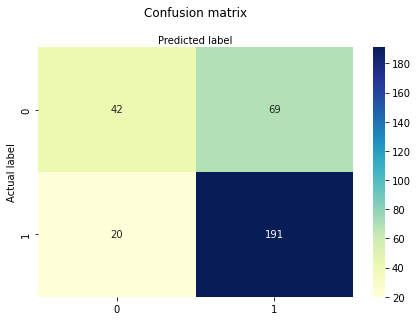

In [33]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [34]:
p_value(X,y)

,Feature,p_value
0,text_length,1.491237e-30
1,symptom_1,5.731039e-29
2,symptom_0,2.359101e-10
3,medication_level_1,8.071507e-11
4,medication_level_2,7.473917e-15
5,medication_level_3,1.799237e-06
6,outside area,1.106719e-27
7,SAM,1.051842e-04
8,SON,7.611581e-04
9,unknown,2.499057e-31


## Logistic without high p-value

In [35]:

eliminate_cols=['ID_DOENTE','PROCESSO','COD_REFERENCIA','result','COD_PZ','COD_UNID_SAUDE_PROV','UNID_PROV','TIPO_UNID','COD_CTH_PRIOR','CTH_PRIOR','COD_MOTIVO_RECUSA','DES_MOTIVO_RECUSA','COD_ESPECIALIDADE','DES_ESPECIALIDADE','agrupadora','OUTRA_ENTIDADE','DATA_RECEPCAO','DATA_ENVIO','DATA_RETORNO','NUM_TAXA','ESTADO','DATA_MARCACAO','DATA_REALIZACAO','OBSERVACOES','Mês_entrada','Ano_entrada','trata data recusa','resume saída','mês_saida','ano_saida','Texto','clean_text','outro','UCSP','3+']
X = data.drop(eliminate_cols,axis=1)# Features
y = data.result # Target variable
features=X.columns
#log_regression is defined in functions
y_pred,coefficients,X_train, X_test, y_train, y_test=random_forest(X,y)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=coefficients.T
df


,Feature,coefficients
0,text_length,0.488309
1,symptom_1,0.114867
2,symptom_0,0.061865
3,medication_level_1,0.037632
4,medication_level_2,0.040082
5,medication_level_3,0.023828
6,outside area,0.010928
7,SAM,0.016210
8,SON,0.002523
9,unknown,0.020323


Accuracy: 0.717391304347826
Recall: 0.6562700140899194
Precision: 0.6859756097560976
              precision    recall  f1-score   support

     refused       0.62      0.46      0.53       111
    accepted       0.75      0.85      0.80       211

    accuracy                           0.72       322
   macro avg       0.69      0.66      0.66       322
weighted avg       0.71      0.72      0.71       322



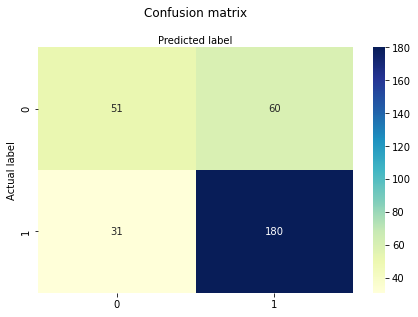

In [36]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
# Evaluate the precision of the model
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


In [23]:
p_value(X,y)


,Feature,p_value
0,text_length,1.491237e-30
1,symptom_1,5.731039e-29
2,symptom_0,2.359101e-10
3,exam_identified,4.201840e-10
4,comorbidity_identified,8.156181e-05
5,medication_level_1,8.071507e-11
6,medication_level_2,7.473917e-15
7,medication_level_3,1.799237e-06
8,outside area,1.106719e-27
9,SAM,1.051842e-04
